In [5]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random

dir='images/detection'
data=[]
categories = ['pappaya','tomato']

for category in categories:
    path=os.path.join(dir,category)
    label=categories.index(category)

    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        print (imgpath)
        fruit_img=cv2.imread(imgpath,1)
        hsv = cv2.cvtColor(fruit_img, cv2.COLOR_BGR2HSV)
        
        try:
            hsv=cv2.resize(hsv,(50,50))
            image=np.array(hsv).flatten()

            data.append([image,label])
        except Exception as e:
            pass

print(len(data))
pick_in=open('fruit_detection.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()
        

images/detection/pappaya/14.jpg
images/detection/pappaya/158.jpg
images/detection/pappaya/39.jpg
images/detection/pappaya/98.jpg
images/detection/pappaya/108.jpg
images/detection/pappaya/133.jpg
images/detection/pappaya/91.jpg
images/detection/pappaya/18.jpg
images/detection/pappaya/7.jpg
images/detection/pappaya/122.jpg
images/detection/pappaya/112.jpg
images/detection/pappaya/63.jpg
images/detection/pappaya/45.jpg
images/detection/pappaya/28.jpg
images/detection/pappaya/33.jpg
images/detection/pappaya/8.jpg
images/detection/pappaya/162.jpg
images/detection/pappaya/76.jpg
images/detection/pappaya/89.jpg
images/detection/pappaya/83.jpg
images/detection/pappaya/70.jpg
images/detection/pappaya/96.jpg
images/detection/pappaya/55.jpg
images/detection/pappaya/86.jpg
images/detection/pappaya/1.jpg
images/detection/pappaya/141.jpg
images/detection/pappaya/200.jpg
images/detection/pappaya/199.jpg
images/detection/pappaya/125.jpg
images/detection/pappaya/192.jpg
images/detection/pappaya/6.jpg
i

images/detection/tomato/15.jpeg
images/detection/tomato/69.jpeg
images/detection/tomato/3.jpeg
images/detection/tomato/98.jpeg
images/detection/tomato/63.jpeg
images/detection/tomato/81.jpeg
images/detection/tomato/65.jpeg
images/detection/tomato/56.jpeg
images/detection/tomato/43.jpeg
images/detection/tomato/80.jpeg
images/detection/tomato/14.jpeg
images/detection/tomato/45.jpeg
images/detection/tomato/75.jpeg
images/detection/tomato/58.jpeg
images/detection/tomato/21.jpeg
images/detection/tomato/61.jpeg
images/detection/tomato/25.jpeg
images/detection/tomato/49.jpeg
images/detection/tomato/67.jpeg
images/detection/tomato/18.jpeg
images/detection/tomato/89.jpeg
images/detection/tomato/77.jpeg
images/detection/tomato/35.jpeg
images/detection/tomato/91.jpeg
images/detection/tomato/29.jpeg
images/detection/tomato/73.jpeg
images/detection/tomato/72.jpeg
images/detection/tomato/53.jpeg
images/detection/tomato/92.jpeg
images/detection/tomato/20.jpeg
images/detection/tomato/90.jpeg
images/de

In [6]:
pick_in=open('fruit_detection.pickle','rb')
pickle.load(pick_in)
pick_in.close()

random.shuffle(data)
features=[]
labels=[]

for feature,label in data:
    features.append(feature)
    labels.append(label)
    
print(features)
print(labels)


[array([115,  54, 224, ..., 115,  52, 188], dtype=uint8), array([112,  44, 235, ..., 116,  42, 204], dtype=uint8), array([103,   8, 228, ..., 110,   3, 240], dtype=uint8), array([117,  50, 228, ..., 116,  57, 179], dtype=uint8), array([113,  60, 232, ..., 115,  53, 216], dtype=uint8), array([115,  53, 228, ..., 117,  51, 180], dtype=uint8), array([  0,   0, 255, ...,   0,   0, 255], dtype=uint8), array([117,  49, 225, ..., 116,  57, 166], dtype=uint8), array([114,  55, 221, ..., 116,  43, 181], dtype=uint8), array([114,  55, 221, ..., 115,  52, 185], dtype=uint8), array([108,  33, 132, ..., 103,  14, 171], dtype=uint8), array([115,  53, 226, ..., 117,  51, 194], dtype=uint8), array([  0,   0, 255, ...,   0,   0, 253], dtype=uint8), array([115,  56, 228, ..., 115,  53, 184], dtype=uint8), array([ 47,  52, 153, ...,  48, 255,  39], dtype=uint8), array([113,  60, 232, ..., 115,  53, 216], dtype=uint8), array([114,  55, 221, ..., 115,  52, 185], dtype=uint8), array([113,  58, 237, ..., 114

Accuracy:  1.0


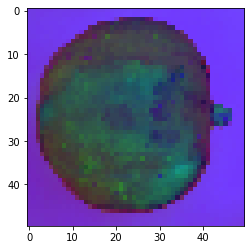

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import joblib

xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size= 0.25)

model = SVC(C=1, kernel='poly', gamma='auto')
model.fit(xtrain, ytrain)
prediction=model.predict(xtest)
accuracy = model.score(xtest,ytest)
print('Accuracy: ', accuracy)
joblib.dump(model,'fruit_detection')

myfruit=xtest[0].reshape(50,50,-1)
plt.imshow(myfruit)
plt.show()